In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, roc_curve, accuracy_score, classification_report

In [2]:
RootData = pd.read_csv("Root_Insurance_data.csv")

In [3]:
RootData

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0
...,...,...,...,...,...,...,...,...
9995,N,1,2,S,10.0,3,True,0
9996,unknown,3,2,M,10.0,3,False,0
9997,Y,3,1,S,10.0,5,False,0
9998,unknown,3,1,M,10.0,3,False,0


In [4]:
y1 = RootData.policies_sold
y2 = RootData.click.astype(int)

In [5]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [6]:
RootData['insured'] = le1.fit_transform(RootData['Currently Insured'])
RootData['single'] = le2.fit_transform(RootData['Marital Status'])

In [7]:
RootData

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold,insured,single
0,unknown,2,1,M,10.0,2,False,0,2,0
1,Y,3,1,M,10.0,5,False,0,1,0
2,Y,3,2,M,10.0,5,False,0,1,0
3,N,3,2,S,10.0,4,False,0,0,1
4,unknown,2,2,S,10.0,2,False,0,2,1
...,...,...,...,...,...,...,...,...,...,...
9995,N,1,2,S,10.0,3,True,0,0,1
9996,unknown,3,2,M,10.0,3,False,0,2,0
9997,Y,3,1,S,10.0,5,False,0,1,1
9998,unknown,3,1,M,10.0,3,False,0,2,0


In [8]:
X = RootData[['Number of Vehicles', 'Number of Drivers', 'rank', 'insured', 'single']] 

In [9]:
def precision_recall(matrix):
    
    tp = matrix[1,1]
    fp = matrix[0,1]
    fn = matrix[1,0]
    
    return tp/(tp+fp), tp/(tp+fn)

In [10]:
def plot_feature_importances(columns, feature_importances, show_top_n=10):
    feats = dict( zip(columns, feature_importances) )
    imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    imp.sort_values(by='Gini-importance').tail(show_top_n).plot(kind='barh', figsize=(8,8))
    plt.show()

training precision = 0.17 and training recall = 0.78
the area under the ROC curve = 0.73


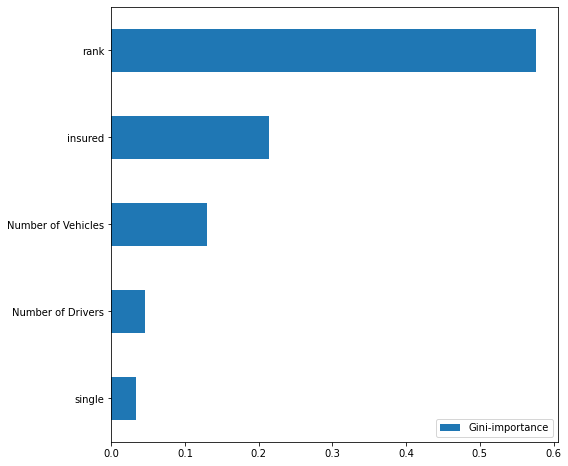

In [11]:
rf1 = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight='balanced')
rf1.fit(X, y1)
print("training precision = %0.2f and training recall = %0.2f" % (precision_recall(confusion_matrix(y1, rf1.predict(X)))))
print('the area under the ROC curve = %0.2f' % (roc_auc_score(y1, rf1.predict(X))))
plot_feature_importances(X.columns, rf1.feature_importances_)

training precision = 0.41 and training recall = 0.71
the area under the ROC curve = 0.74


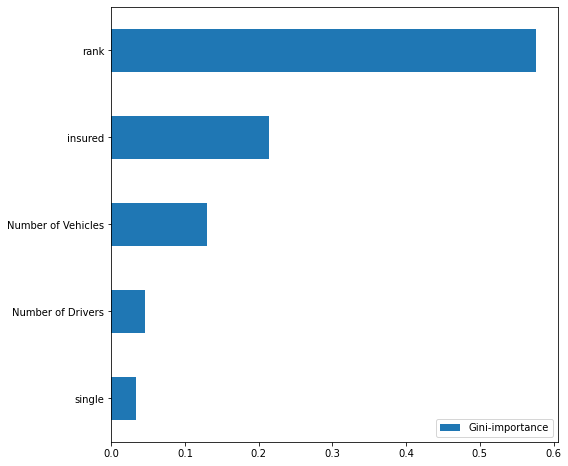

In [12]:
rf2 = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight='balanced')
rf2.fit(X, y2)
print("training precision = %0.2f and training recall = %0.2f" % (precision_recall(confusion_matrix(y2, rf2.predict(X)))))
print('the area under the ROC curve = %0.2f' % (roc_auc_score(y2, rf2.predict(X))))
plot_feature_importances(X.columns, rf1.feature_importances_)

In [13]:
#In comparison, a model that uses only rank as a predictor works almost as well as the full model

'''
rf1 = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight='balanced')
rf1.fit(X[['rank']], y1)
print("training precision = %0.2f and training recall = %0.2f" % (precision_recall(confusion_matrix(y1, rf1.predict(X[['rank']])))))
print('the area under the ROC curve = %0.2f' % (roc_auc_score(y1, rf1.predict(X[['rank']]))))

rf2 = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight='balanced')
rf2.fit(X[['rank']], y2)
print("training precision = %0.2f and training recall = %0.2f" % (precision_recall(confusion_matrix(y2, rf2.predict(X[['rank']])))))
print('the area under the ROC curve = %0.2f' % (roc_auc_score(y1, rf2.predict(X[['rank']]))))

'''

'\nrf1 = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight=\'balanced\')\nrf1.fit(X[[\'rank\']], y1)\nprint("training precision = %0.2f and training recall = %0.2f" % (precision_recall(confusion_matrix(y1, rf1.predict(X[[\'rank\']])))))\nprint(\'the area under the ROC curve = %0.2f\' % (roc_auc_score(y1, rf1.predict(X[[\'rank\']]))))\n\nrf2 = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight=\'balanced\')\nrf2.fit(X[[\'rank\']], y2)\nprint("training precision = %0.2f and training recall = %0.2f" % (precision_recall(confusion_matrix(y2, rf2.predict(X[[\'rank\']])))))\nprint(\'the area under the ROC curve = %0.2f\' % (roc_auc_score(y1, rf2.predict(X[[\'rank\']]))))\n\n'

In [14]:
predict = X[['rank']]

In [15]:
predict['click'] = rf2.predict(X)
predict['buy'] = rf1.predict(X)

<ipython-input-15-9eaf0a2e2d46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict['click'] = rf2.predict(X)
<ipython-input-15-9eaf0a2e2d46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict['buy'] = rf1.predict(X)


In [16]:
predict.groupby(['rank']).mean()

,click,buy
rank,,
1,1.000000,1.000000
2,0.882463,0.841418
3,0.100791,0.216576
4,0.000000,0.021063
5,0.000000,0.000000
